#### Lectura de ficheiros con tweets completos - Algunhas preguntas interesantes sobre os tweets

In [ ]:
# Exercicio de repaso de consultas con spark.sql, lecturas, escrituras, gráficas, ....

# Responde ás preguntas seguintes para coñecer un pouco mellor a estrutura dun Tweet
# Realiza as consultas tanto en "dot notation" como en "SQL notation"
# Exporta os datos de cada consulta CSV
# Visualiza os resultados cunha gráfica (seaborn?)

# Nota: podes practicar con un extracto do ficheiro final e despois executalo co 
# ficheiro completo

In [ ]:
# Realiza as consultas sobre o ficheiro con Tweets: tochotweets proporcionado polo profesor

In [2]:
import pandas as pd
import seaborn as sns

In [4]:
# ficheiro: tochotweets.json
ficheiro = "file:///home/hduser/bigdata-aplicado/datasets/tweets_reais/tochotweets.json"
df = spark.read.json(ficheiro)

In [5]:
# Miro o schema
# A diferenza do exemplo visto anteriormente, un tweet real ten un schema moito mais amplo
# con moita mais información
df.printSchema()

root
 |-- contributors: string (nullable = true)
 |-- coordinates: struct (nullable = true)
 |    |-- coordinates: array (nullable = true)
 |    |    |-- element: double (containsNull = true)
 |    |-- type: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- entities: struct (nullable = true)
 |    |-- hashtags: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- indices: array (nullable = true)
 |    |    |    |    |-- element: long (containsNull = true)
 |    |    |    |-- text: string (nullable = true)
 |    |-- media: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- display_url: string (nullable = true)
 |    |    |    |-- expanded_url: string (nullable = true)
 |    |    |    |-- id: long (nullable = true)
 |    |    |    |-- id_str: string (nullable = true)
 |    |    |    |-- indices: array (nullable = true)
 |    |    |    |    |-- element: long (containsNull = true

In [6]:
# Crea unha vista sobre a que facer consultsa con SQL
df.createOrReplaceTempView('tweets')

In [7]:
# 1. Cales son os países con máis tweets?
# Son fiables os datos?

In [8]:
# dot notation
df.filter(df.place.country != 'null').groupBy('place.country').count().orderBy('count',ascending=False).show()

+--------------+-----+
|       country|count|
+--------------+-----+
| United States| 4437|
|        Brasil| 1043|
|United Kingdom|  601|
|     Indonesia|  360|
|        Canada|  198|
|         Chile|  131|
|        México|  125|
|        España|   95|
|      Malaysia|   90|
|        Italia|   60|
|        France|   55|
|   Reino Unido|   46|
|        Mexico|   36|
|       Ireland|   35|
|       Sverige|   26|
|      Portugal|   22|
|       Türkiye|   22|
|        Sweden|   20|
|        Norway|   20|
|     Nederland|   17|
+--------------+-----+
only showing top 20 rows



In [9]:
# SQL notation
tweetsxpais = spark.sql("SELECT place.country, count(*) as mensaxes FROM tweets WHERE place.country IS NOT NULL GROUP BY place.country ORDER BY mensaxes DESC")
tweetsxpais.show()

+--------------+--------+
|       country|mensaxes|
+--------------+--------+
| United States|    4437|
|        Brasil|    1043|
|United Kingdom|     601|
|     Indonesia|     360|
|        Canada|     198|
|         Chile|     131|
|        México|     125|
|        España|      95|
|      Malaysia|      90|
|        Italia|      60|
|        France|      55|
|   Reino Unido|      46|
|        Mexico|      36|
|       Ireland|      35|
|       Sverige|      26|
|      Portugal|      22|
|       Türkiye|      22|
|        Sweden|      20|
|        Norway|      20|
|     Nederland|      17|
+--------------+--------+
only showing top 20 rows



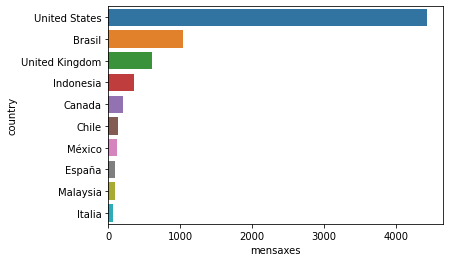

In [11]:
topcountries = tweetsxpais.toPandas().iloc[:10]
ax = sns.barplot(data=topcountries,y='country',x='mensaxes')

In [12]:
# Escritura a ficheiro
tweetsxpais.write.csv('file:///home/hduser/output/tweets/tweetsxpais.csv')

In [13]:
tweetsxpais.toPandas().to_csv('/home/hduser/output/tweets/tweesxpais_pandas.csv')

In [ ]:
# 2. Cales é o idioma máis presente na rede?
# Son fiables os datos?

In [ ]:
# dot notation
df.filter(df.lang != 'null').groupBy('lang').count().orderBy('count',ascending=False).show()

In [ ]:
# sql notation
tweetsxlingua = spark.sql("SELECT lang, count(*) AS conta FROM tweets GROUP BY lang ORDER BY conta DESC")
tweetsxlingua.show()

In [ ]:
toplinguas = tweetsxlingua.toPandas().iloc[:10]
ax = sns.barplot(data=toplinguas,y='lang',x='conta')

In [ ]:
# Escritura a ficheiro
tweetsxlingua.write.csv('file:///home/hduser/output/tweets/tweetsxlingua.csv',sep=';')
tweetsxlingua.toPandas().to_csv('/home/hduser/output/tweets/tweesxlingua_pandas.csv',sep=';',index=None)

In [ ]:
# 3. Tweeteiros máis activos

In [ ]:
# dot notation
df.filter(df.user.screen_name != 'null').groupBy(df.user.screen_name).count().orderBy('count',ascending=False).show()

In [ ]:
# SQL notation
tuiteirosactivos = spark.sql("SELECT user.screen_name, count(*) AS conta \
          FROM tweets WHERE user.screen_name IS NOT NULL \
          GROUP BY user.screen_name \
          ORDER BY conta DESC")
tuiteirosactivos.show()

In [ ]:
toptuiteiros = tuiteirosactivos.toPandas().iloc[:10]
ax = sns.barplot(data=toptuiteiros,y='screen_name',x='conta')

In [ ]:
# Escritura a ficheiro
tuiteirosactivos.write.csv('file:///home/hduser/output/tweets/tuiteirosactivos.csv',sep=';')
tuiteirosactivos.toPandas().to_csv('/home/hduser/output/tweets/tuiteirosactivos_pandas.csv',sep=';',index=None)

In [ ]:
# 4. Tweeteiros con máis seguidores

In [ ]:
# dot notation
df.select(df.user.screen_name,df.user.followers_count.alias('followers')).orderBy('followers',ascending=False).show()

In [ ]:
# SQL notation
tfollowers = spark.sql('SELECT user.screen_name AS user, user.followers_count AS followers FROM tweets ORDER BY followers DESC')
tfollowers.show()

In [ ]:
topfollowers = tfollowers.toPandas().iloc[0:10]
ax = sns.barplot(data=topfollowers,y='user',x='followers')

In [ ]:
# Escritura a ficheiro
tfollowers.write.csv('file:///home/hduser/output/tweets/tfollowers.csv',sep=';')
tfollowers.toPandas().to_csv('/home/hduser/output/tweets/tfollowers_pandas.csv',sep=';',index=None)